In [1]:
# Import Libraries Needed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from numpy import inf
%matplotlib inline

# Loading the Dataset

x: The independent variables  
y: The dependent variable (Target)


CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per 10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - lower status of the population

MEDV - Median value of owner-occupied homes in 1000's

In [2]:
boston = datasets.load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names
boston_df = pd.DataFrame(data = boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Concatenate the dataframes for usage later.

In [3]:
boston_full = pd.DataFrame(data = (boston.data), columns = columns)
boston_target = pd.DataFrame(data = (boston.target), columns = ["MEDV"])
boston_full = pd.concat([boston_full , boston_target], axis = 1)
boston_full.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Find Outliers using visualizations

One interesting approach to find out outliers is to visualize the data using different visualization techniques, which gives an initial look into these peculiar data points. Some of the techniques used are:
 - Box plots
 - Scatter plots
 - Data distribution

### Boxplot

The first approach we will look at, is using a boxplot.

A boxplot is a way to visualize data using a 5 number summery:
 - Median
 - Q1
 - Q3
 - Minimum
 - Maximum

 <img src=https://www.simplypsychology.org/boxplot.jpg width="400">

In [4]:
def boxplot_summery(nums):
    ex_q1     = np.percentile(nums, 25)
    ex_median = np.percentile(nums, 50)
    ex_q3     = np.percentile(nums, 75)
    ex_iqr    = ex_q3 - ex_q1
    ex_min    = ex_q1 - 1.5 * ex_iqr
    ex_max    = ex_q3 + 1.5 * ex_iqr

    print(nums)
    print(f"Min = {ex_min}   Q1 = {ex_q1}   Median = {ex_median}   Q3 = {ex_q3}   Max = {ex_max}   IQR = {ex_iqr}")

In [5]:
nums = np.arange(1, 11)

boxplot_summery(nums)

[ 1  2  3  4  5  6  7  8  9 10]
Min = -3.5   Q1 = 3.25   Median = 5.5   Q3 = 7.75   Max = 14.5   IQR = 4.5


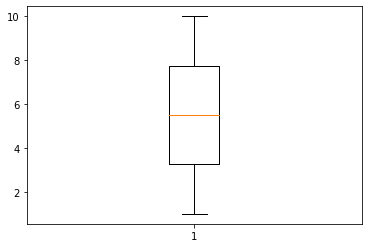

In [6]:
plt.boxplot(nums);

[ 1  2  3  4  5  6  7  8  9 10 15 25]
Min = -4.5   Q1 = 3.75   Median = 6.5   Q3 = 9.25   Max = 17.5   IQR = 5.5


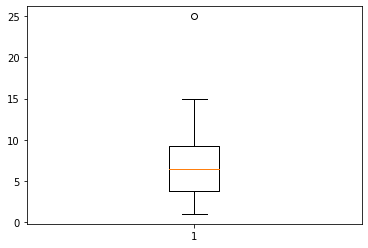

In [7]:
# Add an outlier
nums = np.append(nums, 15)
nums = np.append(nums, 25)

boxplot_summery(nums)
plt.boxplot(nums);

Now back to our boston dataset, Lets look at the boxplot for the `DIS` column as a univariate analysis seaborn

C:\Mazen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIS'>

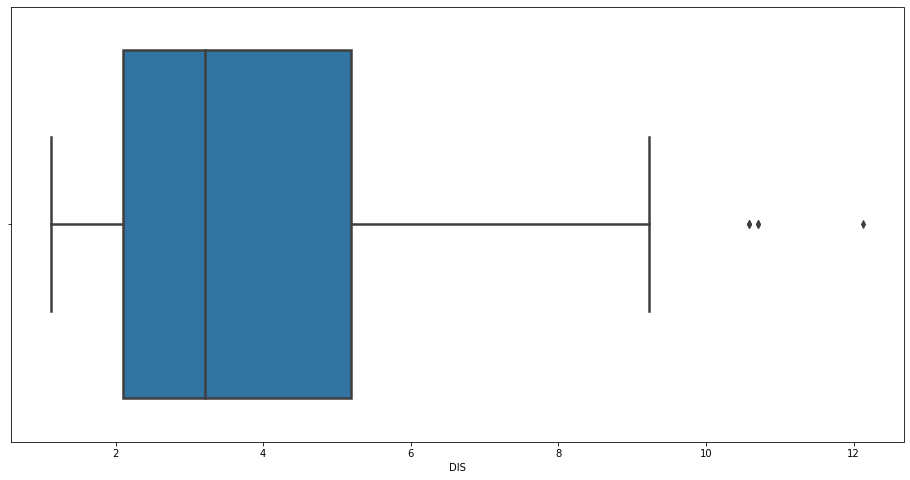

In [8]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(boston_df['DIS'], ax = ax, linewidth=2.5)

### Scatter plots

The next technique for visualizing the data and looking for outliers, is using the loyal fellow (scatter plots) and we are basically plotting the points and looking for points that seem far from the remaining cluster of points or not going in the same pattern.

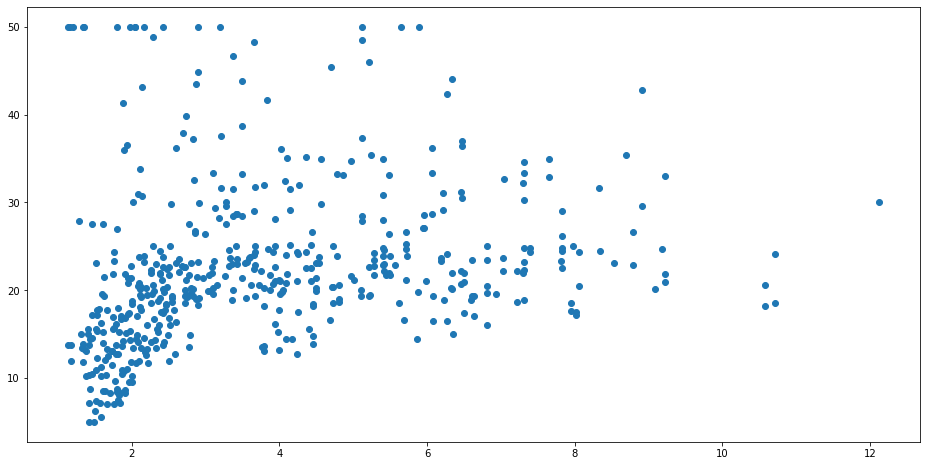

In [9]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(x = boston_df['DIS'], y =  y)
plt.show()

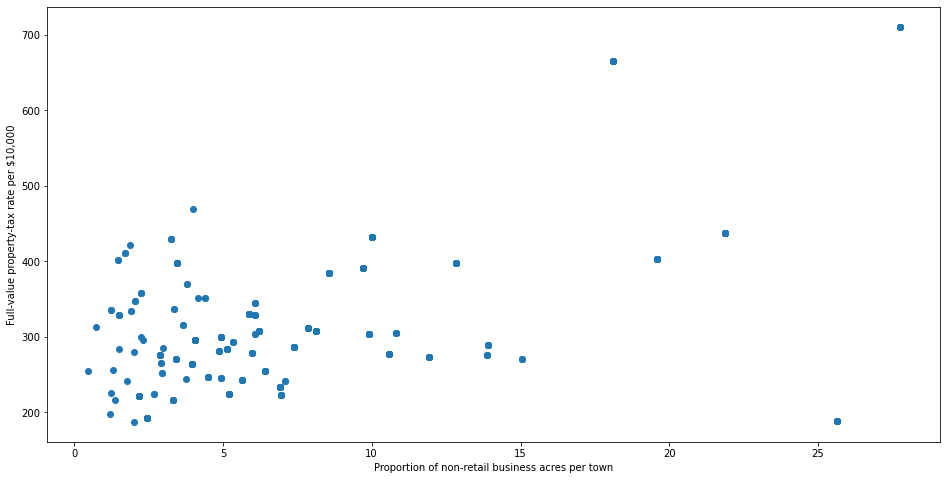

In [10]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

## Find Outliers using numerically

Now as we have seen in the visualization approach, that we can see the outliers, but we can not know by just looking at them, which ones are they exactly. 

Additionally, imagine you have a dataframe with dozen records & features, then just visualizing each is really tedious.


Thus, some of the ways to find outliers numerically that we are going to explore are:
 - Z-score
 - IQR score

### Z-score

Fist we need to normalize the dataset 
\begin{equation*}
Normalized = \frac{x - \mu}{\sigma}
\end{equation*}


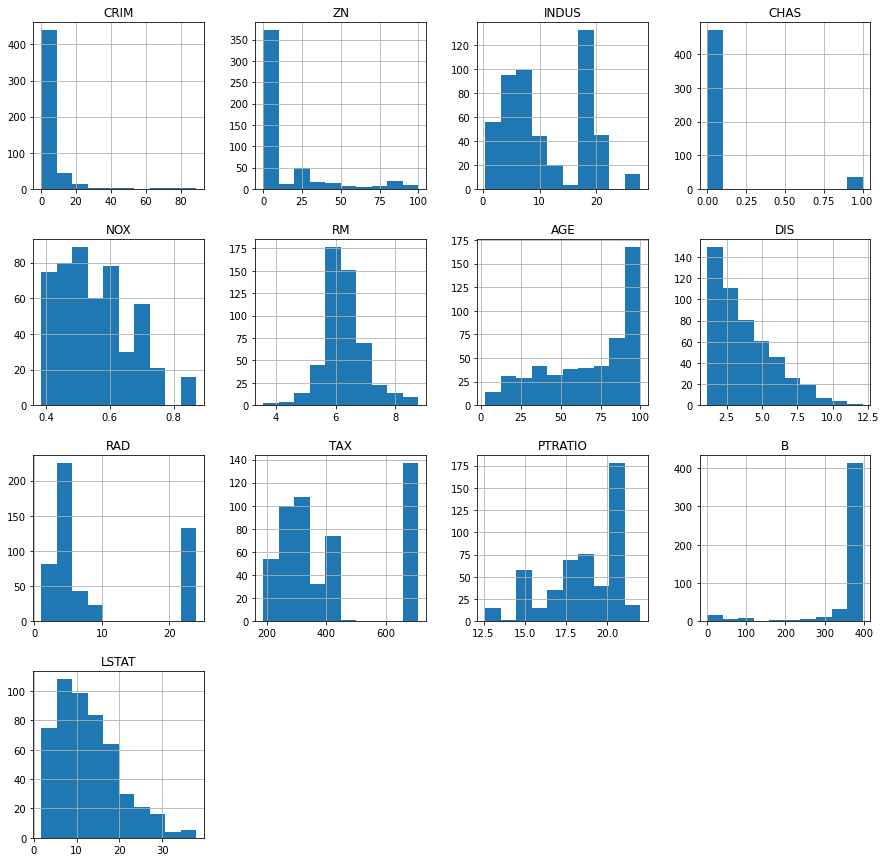

In [11]:
boston_df.hist(figsize= (15, 15));

Now lets transform the dataframe by making the mean = 0 & std = 1.

In [12]:
z_scores = stats.zscore(boston_df)

boston_stand = pd.DataFrame(data = z_scores, columns = boston_df.columns)
boston_stand.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


Lets take another look at the distribution after the standerdization

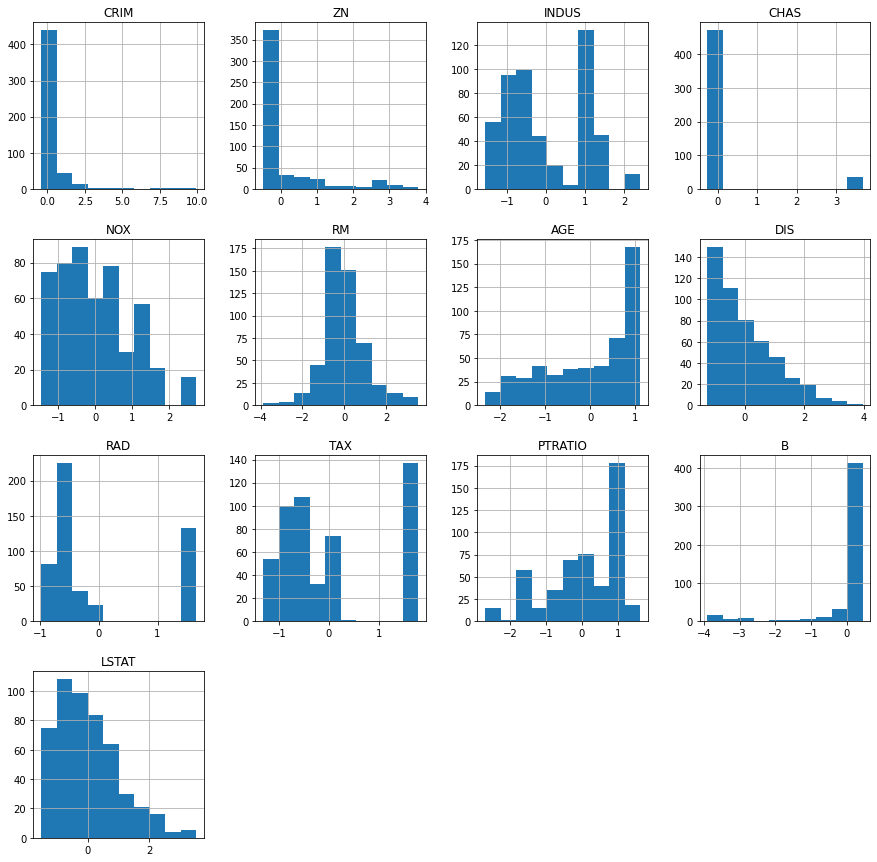

In [13]:
boston_stand.hist(figsize=(15, 15));

In [14]:
threshold = 3
mask = (boston_stand < -3) | (boston_stand > 3)
display(np.where(mask))
mask


(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
        200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
        220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
        277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
        357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
        380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
        416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
        437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64),
 array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
         1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
         5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
         3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
         0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
        11,  0, 11, 11, 11, 11, 11, 11, 1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
boston_df[(boston_df >= -3) & (boston_df <= (3))]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,NaN,2.31,0.0,0.538,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,0.02731,0.0,NaN,0.0,0.469,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2,0.02729,0.0,NaN,0.0,0.469,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
3,0.03237,0.0,2.18,0.0,0.458,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.94
4,0.06905,0.0,2.18,0.0,0.458,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,NaN,0.0,0.573,NaN,NaN,2.4786,1.0,NaN,NaN,NaN,NaN
502,0.04527,0.0,NaN,0.0,0.573,NaN,NaN,2.2875,1.0,NaN,NaN,NaN,NaN
503,0.06076,0.0,NaN,0.0,0.573,NaN,NaN,2.1675,1.0,NaN,NaN,NaN,NaN
504,0.10959,0.0,NaN,0.0,0.573,NaN,NaN,2.3889,1.0,NaN,NaN,NaN,NaN


### IQR (Inter-Quartile Range)

''
In descriptive statistics, the interquartile range (IQR), also called the midspread, middle 50%, or H‑spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles''
<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1200px-Boxplot_vs_PDF.svg.png width="500">



In [15]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [16]:
(boston_df < (Q1 - 1.5 * IQR | (boston_df > (Q3 + 1.5 * IQR))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
boston_df[(boston_df > (Q1 - 1.5 * IQR)) & (boston_df < (Q3 + 1.5 * IQR))]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,NaN,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,NaN,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,NaN,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,NaN,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,NaN,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,NaN,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,NaN,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,NaN,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,NaN,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


### Conditional Probability

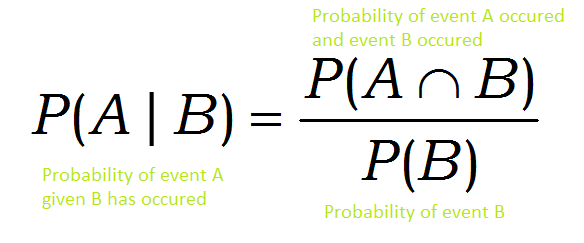

Calculate 

$$ P(A|B) $$

A: MEDV is greater than its mean

B: AGE is greater than its mean

In [18]:
prob_A_and_B = len(boston_full[(boston_full['MEDV'] > boston_full.MEDV.mean()) & 
                               (boston_full['AGE'] > boston_full.AGE.mean())]) / len(boston_full)
prob_B = len(boston_full[(boston_full['AGE'] > boston_full.AGE.mean())]) / len(boston_full)
prob_A_given_B = prob_A_and_B / prob_B
prob_A_given_B

0.2525597269624573

Suppose: We tossed 2 coins 
- X: random variable that models the first coin toss's output 
- Y: random variable that models the second coin toss's output 

Is X, Y independent?

In [29]:
import string
import random


berns_1 = (np.random.choice(['H', 'T'], 1000000))
berns_2 = (np.random.choice(['H', 'T'], 1000000))


In [30]:
df = pd.DataFrame({'X':berns_1, 'Y':berns_2})
pd.crosstab(df['X'], df['Y'], dropna=False) / len(df)

Y,H,T
X,,
H,0.249808,0.250709
T,0.250295,0.249188
